In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### 1.Lineer Regression

In [3]:
# Load the data
data = pd.read_csv('WORKINGF1Data.csv')

In [4]:
# Encode categorical variables
label_encoder_gp = LabelEncoder()
label_encoder_driver = LabelEncoder()
label_encoder_constructor = LabelEncoder()

In [7]:
data['Grand Prix'] = label_encoder_gp.fit_transform(data['Grand Prix'])
data['Driver'] = label_encoder_driver.fit_transform(data['Driver'])
data['Constructor'] = label_encoder_constructor.fit_transform(data['Constructor'])

In [8]:
# Select features and target variable
features = data.drop(columns=['Grid Position'])
target = data['Grid Position']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
# Initialize and train the linear regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions
y_pred = linear_regressor.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
# Print results
print(f"Linear Regression - MSE: {mse}, R²: {r2}")

Linear Regression - MSE: 21.46948863351422, R²: 0.4272709032581059


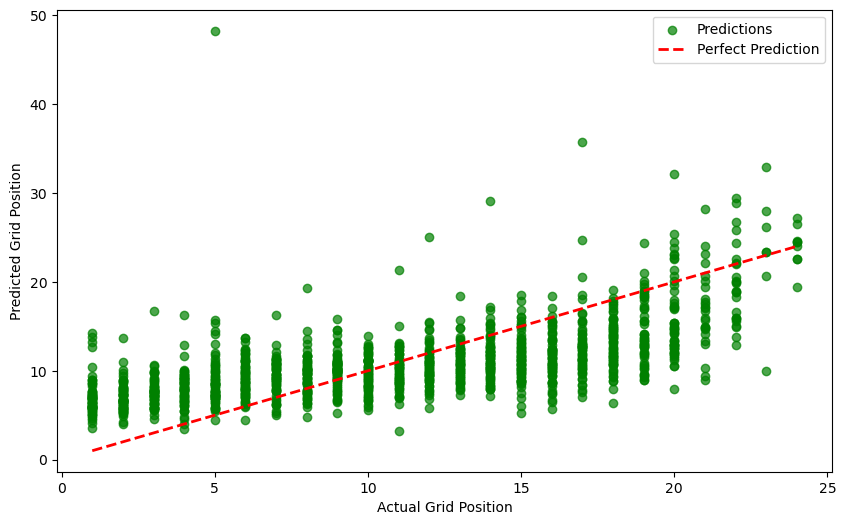

In [15]:
# Create a performance plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Grid Position')
plt.ylabel('Predicted Grid Position')
plt.legend()
plt.savefig('Linear_Regression_Performance.png')
plt.show()

### 2.Random Forest

In [16]:
# Initialize and train the Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Make predictions
y_pred_rf = random_forest_regressor.predict(X_test)

In [18]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [19]:
# Print results
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")

Random Forest - MSE: 13.456809419743783, R²: 0.6410204995769322


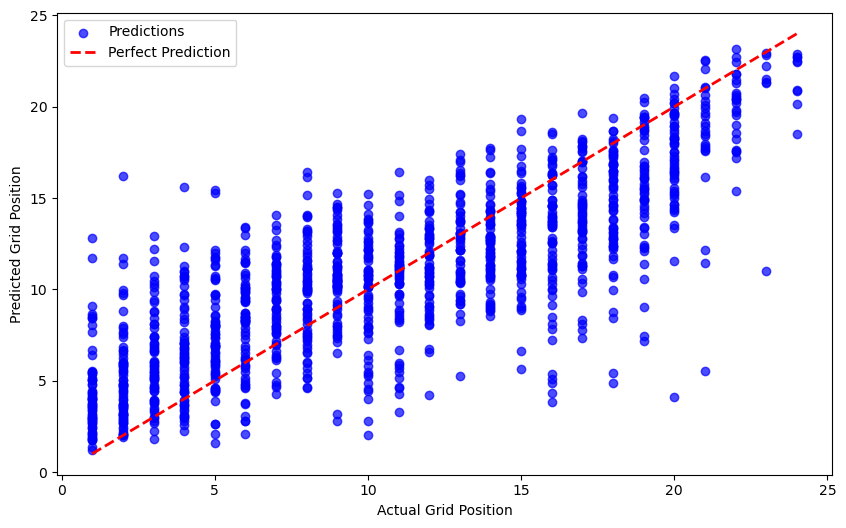

In [20]:
# Create a performance plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Grid Position')
plt.ylabel('Predicted Grid Position')
plt.legend()
plt.savefig('Random_Forest_Performance.png')
plt.show()